In [9]:
#  PASO 1: IMPORTACIÓN DE LIBRERÍAS
import pandas as pd

# PASO 2: CARGA DE ARCHIVOS CSV
archivos = [
    '2020_Accidentalidad.csv',
    '2021_Accidentalidad.csv',
    '2022_Accidentalidad.csv',
    '2023_Accidentalidad.csv',
    '2024_Accidentalidad.csv',
    '2025_Accidentalidad.csv'
]

#  PASO 3: LECTURA Y UNIÓN DE LOS ARCHIVOS
dataframes = [pd.read_csv(archivo, sep=';', encoding='utf-8') for archivo in archivos]
df = pd.concat(dataframes, ignore_index=True)

#  PASO 4: CREACIÓN DE LA VARIABLE OBJETIVO 'gravedad'
def clasificar_gravedad(lesividad):
    if lesividad in [
        'Ingreso superior a 24 horas',
        'Ingreso inferior o igual a 24 horas',
        'Fallecido 24 horas'
    ]:
        return 'Grave'
    elif lesividad in [
        'Asistencia sanitaria inmediata en centro de salud o mutua',
        'Asistencia sanitaria sólo en el lugar del accidente'
    ]:
        return 'Moderado'
    elif lesividad in [
        'Asistencia sanitaria ambulatoria con posterioridad',
        'Sin asistencia sanitaria'
    ]:
        return 'Leve'
    else:
        return None

df['gravedad'] = df['lesividad'].apply(clasificar_gravedad)
df = df.drop(columns='lesividad')


# PASO 5: ELIMINACIÓN DE COLUMNAS IRRELEVANTES
columnas_eliminar = [
    'num_expediente', 'numero', 'cod_distrito',
    'cod_lesividad', 'coordenada_x_utm', 'coordenada_y_utm'
]
df = df.drop(columns=columnas_eliminar)

# PASO 6: ELIMINACIÓN DE FILAS CON VALORES NULOS EN 'gravedad'
df = df[df['gravedad'].notnull()].copy()

# PASO 7: MOSTRAR RESULTADO FINAL DE LA LIMPIEZA
df.head()


,fecha,hora,localizacion,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,positiva_alcohol,positiva_droga,gravedad
17,01/01/2020,5:05:00,"CALL. EUGENIA DE MONTIJO, 60",CARABANCHEL,Colisión lateral,Despejado,Turismo,Pasajero,De 45 a 49 años,Hombre,N,NaN,Leve
18,01/01/2020,6:13:00,CALL. BOCANGEL / CALL. MARQUES DE MONDEJAR,SALAMANCA,Colisión fronto-lateral,Despejado,Motocicleta > 125cc,Conductor,De 40 a 44 años,Hombre,N,NaN,Grave
19,01/01/2020,6:13:00,CALL. BOCANGEL / CALL. MARQUES DE MONDEJAR,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Conductor,De 25 a 29 años,Mujer,N,NaN,Leve
20,01/01/2020,6:13:00,CALL. BOCANGEL / CALL. MARQUES DE MONDEJAR,SALAMANCA,Colisión fronto-lateral,Despejado,Turismo,Pasajero,De 25 a 29 años,Mujer,N,NaN,Leve
30,01/01/2020,2:00:00,PASEO. CASTELLANA / CALL. RAFAEL SALGADO,CHAMARTÍN,Colisión frontal,Despejado,Turismo,Conductor,De 35 a 39 años,Hombre,N,NaN,Leve


# Nueva sección

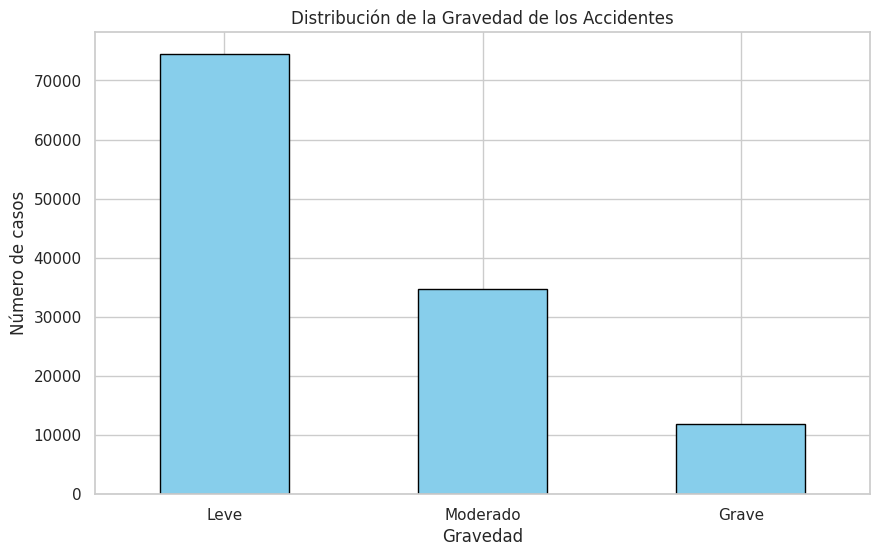

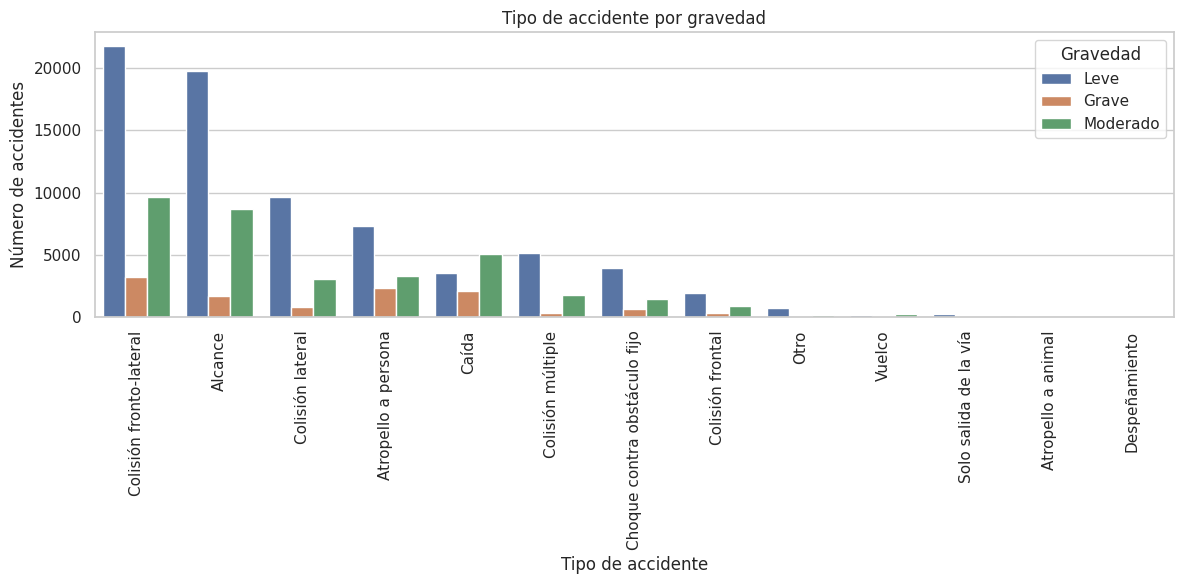

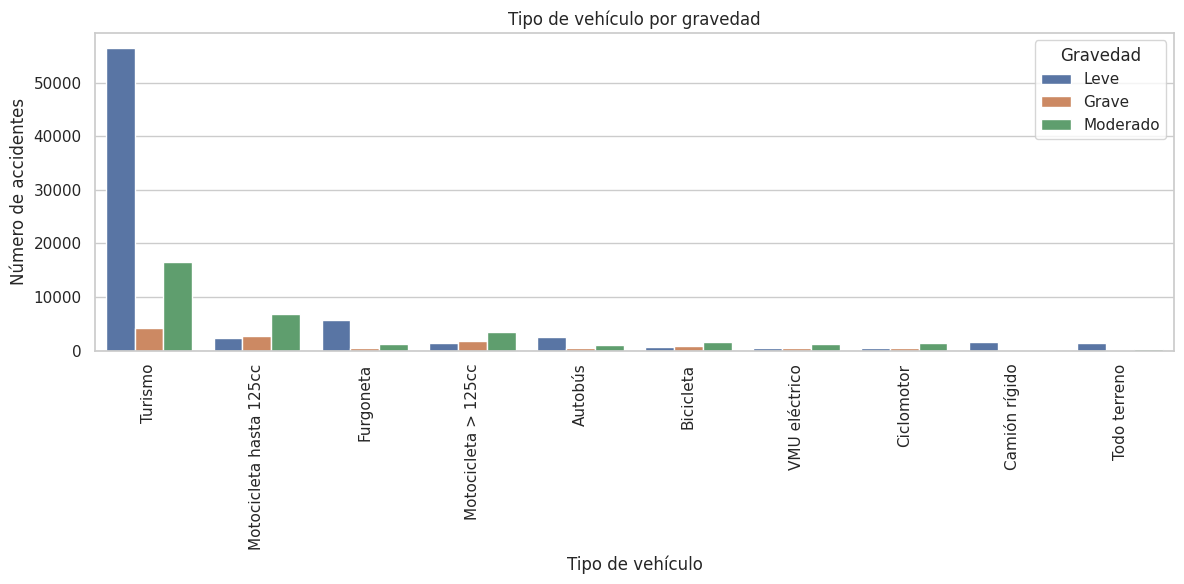

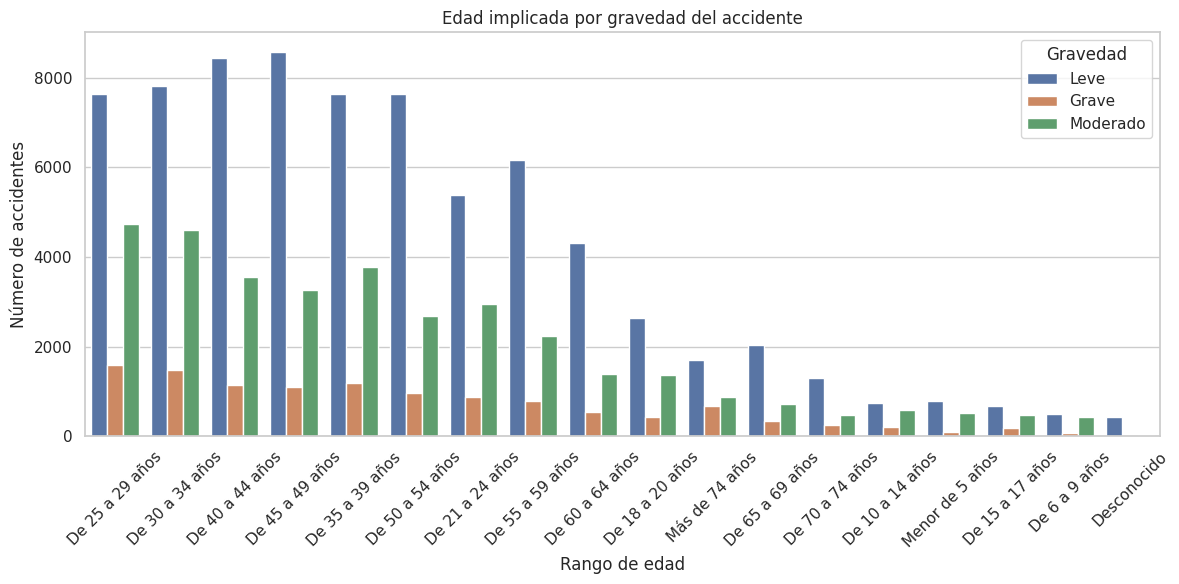

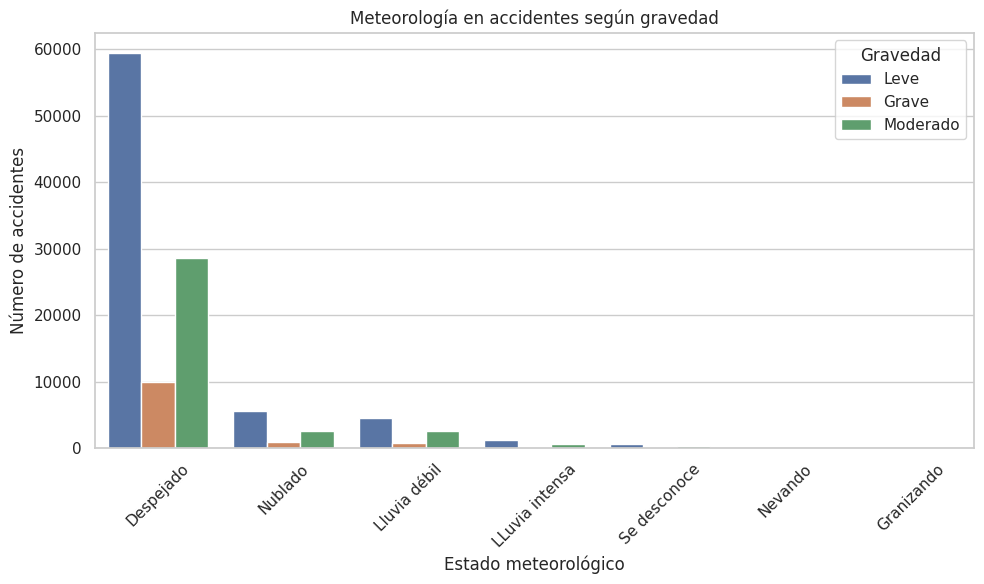

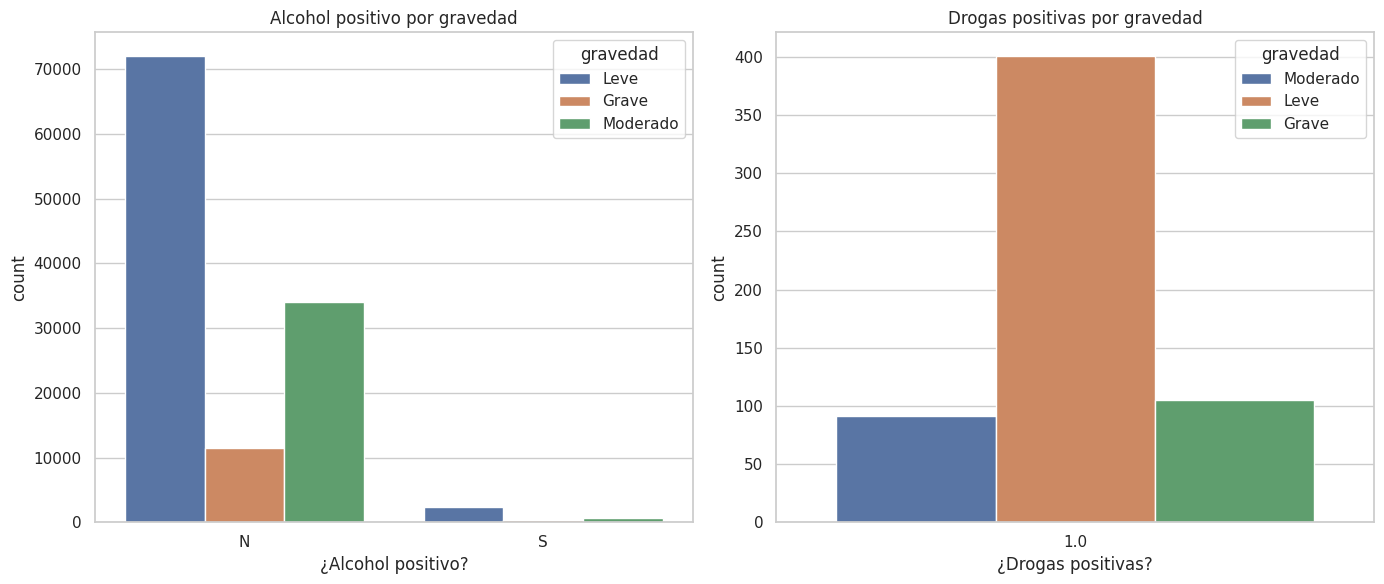

Valores nulos por columna:
positiva_droga          120420
estado_meteorológico      2970
tipo_vehiculo              155
distrito                     5
tipo_accidente               4
dtype: int64


In [10]:
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

# Configuración general de visualización
plt.style.use('default')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# 1. Distribución de la variable objetivo: gravedad
df['gravedad'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la Gravedad de los Accidentes')
plt.xlabel('Gravedad')
plt.ylabel('Número de casos')
plt.xticks(rotation=0)
plt.show()

# 2. Recuento de accidentes por tipo de accidente y gravedad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tipo_accidente', hue='gravedad', order=df['tipo_accidente'].value_counts().index)
plt.title('Tipo de accidente por gravedad')
plt.xlabel('Tipo de accidente')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=90)
plt.legend(title='Gravedad')
plt.tight_layout()
plt.show()

# 3. Recuento por tipo de vehículo y gravedad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tipo_vehiculo', hue='gravedad', order=df['tipo_vehiculo'].value_counts().index[:10])
plt.title('Tipo de vehículo por gravedad')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=90)
plt.legend(title='Gravedad')
plt.tight_layout()
plt.show()

# 4. Distribución por edad y gravedad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='rango_edad', hue='gravedad', order=df['rango_edad'].value_counts().index)
plt.title('Edad implicada por gravedad del accidente')
plt.xlabel('Rango de edad')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Gravedad')
plt.tight_layout()
plt.show()

# 5. Estado meteorológico vs gravedad
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='estado_meteorológico', hue='gravedad', order=df['estado_meteorológico'].value_counts().index)
plt.title('Meteorología en accidentes según gravedad')
plt.xlabel('Estado meteorológico')
plt.ylabel('Número de accidentes')
plt.xticks(rotation=45)
plt.legend(title='Gravedad')
plt.tight_layout()
plt.show()

# 6. Alcohol y drogas en accidentes por gravedad
fig, ax = plt.subplots(1, 2, figsize=(14, 6))
sns.countplot(data=df, x='positiva_alcohol', hue='gravedad', ax=ax[0])
ax[0].set_title('Alcohol positivo por gravedad')
ax[0].set_xlabel('¿Alcohol positivo?')

sns.countplot(data=df, x='positiva_droga', hue='gravedad', ax=ax[1])
ax[1].set_title('Drogas positivas por gravedad')
ax[1].set_xlabel('¿Drogas positivas?')

plt.tight_layout()
plt.show()

# 7. Comprobación de valores nulos
valores_nulos = df.isnull().sum().sort_values(ascending=False)
print("Valores nulos por columna:")
print(valores_nulos[valores_nulos > 0])


In [11]:
# PASO 1: COPIA DEL DATASET PARA MODELOS
df_modelo = df.copy()

# PASO 2: CONVERSIÓN DE FECHA Y HORA
# Extraemos variables útiles: día de la semana, mes y hora como número
df_modelo['fecha'] = pd.to_datetime(df_modelo['fecha'], dayfirst=True, errors='coerce')
df_modelo['hora'] = pd.to_datetime(df_modelo['hora'], format='%H:%M:%S', errors='coerce').dt.hour

df_modelo['dia_semana'] = df_modelo['fecha'].dt.dayofweek  # 0 = lunes, 6 = domingo
df_modelo['mes'] = df_modelo['fecha'].dt.month

# Eliminamos 'fecha' (ya tenemos sus componentes) y 'localizacion' (demasiado específica)
df_modelo = df_modelo.drop(columns=['fecha', 'localizacion'])

# PASO 3: CODIFICACIÓN DE VARIABLES CATEGÓRICAS
# Usamos One-Hot Encoding para variables no ordinales
columnas_categoricas = [
    'distrito', 'tipo_accidente', 'estado_meteorológico',
    'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo',
    'positiva_alcohol', 'positiva_droga'
]

df_modelo = pd.get_dummies(df_modelo, columns=columnas_categoricas, drop_first=True)

# PASO 4: CODIFICACIÓN DE LA VARIABLE OBJETIVO
# Transformamos gravedad en etiquetas numéricas
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_modelo['gravedad'] = le.fit_transform(df_modelo['gravedad'])  # Leve=1, Moderado=2, Grave=0 (orden no garantizado)

# PASO 5: DATASET FINAL LISTO PARA ENTRENAR
df_modelo.head()


,hora,gravedad,dia_semana,mes,distrito_BARAJAS,distrito_CARABANCHEL,distrito_CENTRO,distrito_CHAMARTÍN,distrito_CHAMBERÍ,distrito_CIUDAD LINEAL,...,rango_edad_De 6 a 9 años,rango_edad_De 60 a 64 años,rango_edad_De 65 a 69 años,rango_edad_De 70 a 74 años,rango_edad_Desconocido,rango_edad_Menor de 5 años,rango_edad_Más de 74 años,sexo_Hombre,sexo_Mujer,positiva_alcohol_S
17,5,1,2,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
18,6,0,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
19,6,1,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
20,6,1,2,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
30,2,1,2,1,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


<ipython-input-12-2429504119>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gravedad', data=df, palette='coolwarm')


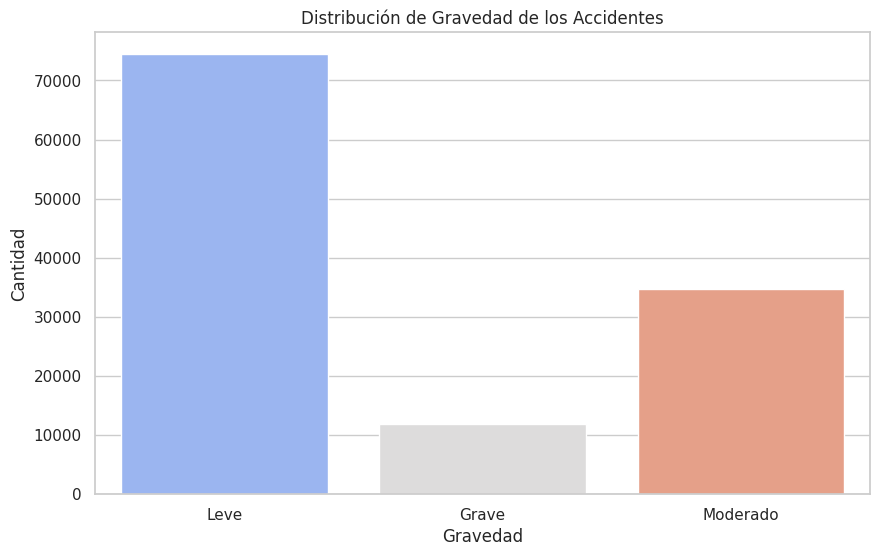

In [12]:
# 1. Distribución general de la variable objetivo
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='gravedad', data=df, palette='coolwarm')
plt.title('Distribución de Gravedad de los Accidentes')
plt.xlabel('Gravedad')
plt.ylabel('Cantidad')
plt.show()


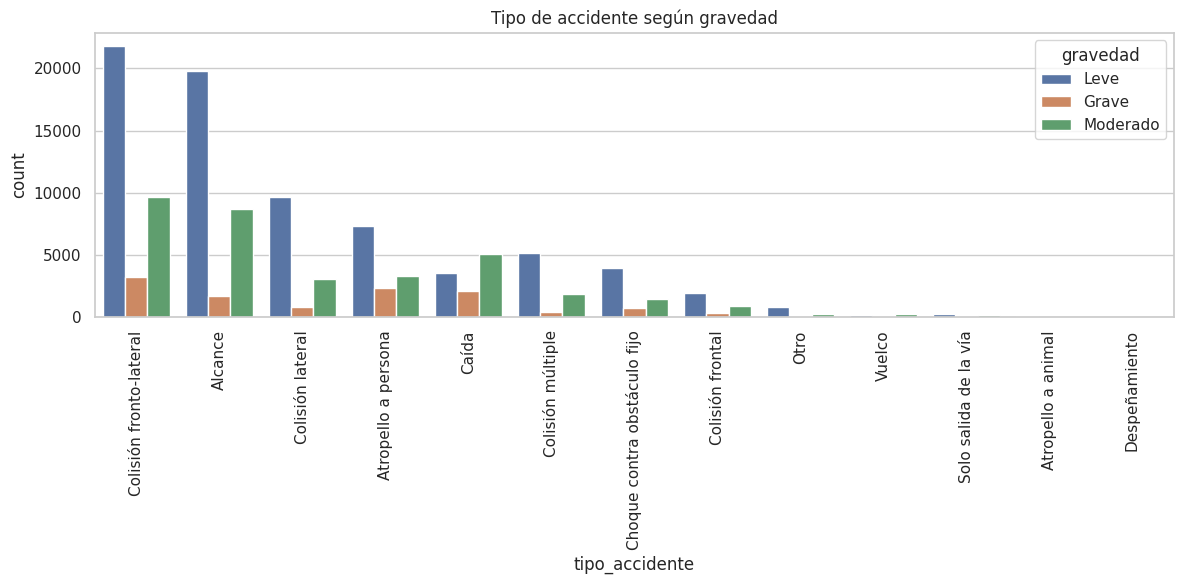

In [13]:
# 2. Análisis cruzado: tipo de accidente vs gravedad
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tipo_accidente', hue='gravedad', order=df['tipo_accidente'].value_counts().index)
plt.title('Tipo de accidente según gravedad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [14]:

# Tablas de accidentes con alcohol y drogas según gravedad

# TABLA 1: Número de accidentes con alcohol positivo por gravedad
tabla_1 = df[df['positiva_alcohol'] == 'S']['gravedad'].value_counts()

# TABLA 2: Número de accidentes con drogas positivas por gravedad
tabla_2 = df[df['positiva_droga'] == 1.0]['gravedad'].value_counts()

# TABLA 3: Porcentaje de accidentes con alcohol positivo por gravedad
tabla_3 = (tabla_1 / tabla_1.sum()) * 100

# TABLA 4: Porcentaje de accidentes con alcohol negativo por gravedad
tabla_4 = (df[df['positiva_alcohol'] == 'N']['gravedad'].value_counts(normalize=True) * 100)

# TABLA 5: Porcentaje de accidentes con drogas positivas por gravedad
tabla_5 = (tabla_2 / tabla_2.sum()) * 100

# TABLA 6: Porcentaje de accidentes con drogas negativas por gravedad
tabla_6 = (df[df['positiva_droga'] == 0.0]['gravedad'].value_counts(normalize=True) * 100)

# Unir todas las tablas en un solo DataFrame
resumen_tablas = pd.DataFrame({
    'Tabla_1_Nº_Alcohol_Pos': tabla_1,
    'Tabla_2_Nº_Drogas_Pos': tabla_2,
    'Tabla_3_%_Alcohol_Pos': tabla_3,
    'Tabla_4_%_Alcohol_Neg': tabla_4,
    'Tabla_5_%_Drogas_Pos': tabla_5,
    'Tabla_6_%_Drogas_Neg': tabla_6
}).fillna(0).round(2)

# Mostrar resultado
resumen_tablas


,Tabla_1_Nº_Alcohol_Pos,Tabla_2_Nº_Drogas_Pos,Tabla_3_%_Alcohol_Pos,Tabla_4_%_Alcohol_Neg,Tabla_5_%_Drogas_Pos,Tabla_6_%_Drogas_Neg
gravedad,,,,,,
Grave,396,105,11.52,9.80,17.59,0.0
Leve,2339,401,68.03,61.31,67.17,0.0
Moderado,703,91,20.45,28.89,15.24,0.0


In [15]:
from IPython.display import display, Markdown

# Tabla 1: número de accidentes por gravedad con alcohol positivo
tabla_1 = df[df['positiva_alcohol'] == 'S']['gravedad'].value_counts().rename("Nº Alcohol Positivo").to_frame()
display(Markdown("### 🧪 Tabla 1: Nº de accidentes con **alcohol positivo** por gravedad"))
display(tabla_1)

# Tabla 2: número de accidentes por gravedad con drogas positivas
tabla_2 = df[df['positiva_droga'] == 1.0]['gravedad'].value_counts().rename("Nº Drogas Positivas").to_frame()
display(Markdown("### 🧪 Tabla 2: Nº de accidentes con **drogas positivas** por gravedad"))
display(tabla_2)

# Tabla 3: porcentaje con alcohol positivo
tabla_3 = ((tabla_1["Nº Alcohol Positivo"] / tabla_1["Nº Alcohol Positivo"].sum()) * 100).round(2)
tabla_3 = tabla_3.rename("Porcentaje Alcohol Positivo").to_frame()
display(Markdown("### 📊 Tabla 3: % de accidentes con **alcohol positivo** por gravedad"))
display(tabla_3)

# Tabla 4: porcentaje con alcohol negativo
tabla_4 = (df[df['positiva_alcohol'] == 'N']['gravedad'].value_counts(normalize=True) * 100).round(2)
tabla_4 = tabla_4.rename("Porcentaje Alcohol Negativo").to_frame()
display(Markdown("### 📊 Tabla 4: % de accidentes con **alcohol negativo** por gravedad"))
display(tabla_4)

# Tabla 5: porcentaje con drogas positivas
tabla_5 = ((tabla_2["Nº Drogas Positivas"] / tabla_2["Nº Drogas Positivas"].sum()) * 100).round(2)
tabla_5 = tabla_5.rename("Porcentaje Drogas Positivas").to_frame()
display(Markdown("### 📊 Tabla 5: % de accidentes con **drogas positivas** por gravedad"))
display(tabla_5)

# Tabla 6: porcentaje con drogas negativas
tabla_6 = (df[df['positiva_droga'] == 0.0]['gravedad'].value_counts(normalize=True) * 100).round(2)
tabla_6 = tabla_6.rename("Porcentaje Drogas Negativas").to_frame()
display(Markdown("### 📊 Tabla 6: % de accidentes con **drogas negativas** por gravedad"))
display(tabla_6)


### 🧪 Tabla 1: Nº de accidentes con **alcohol positivo** por gravedad

,Nº Alcohol Positivo
gravedad,
Leve,2339
Moderado,703
Grave,396


### 🧪 Tabla 2: Nº de accidentes con **drogas positivas** por gravedad

,Nº Drogas Positivas
gravedad,
Leve,401
Grave,105
Moderado,91


### 📊 Tabla 3: % de accidentes con **alcohol positivo** por gravedad

,Porcentaje Alcohol Positivo
gravedad,
Leve,68.03
Moderado,20.45
Grave,11.52


### 📊 Tabla 4: % de accidentes con **alcohol negativo** por gravedad

,Porcentaje Alcohol Negativo
gravedad,
Leve,61.31
Moderado,28.89
Grave,9.80


### 📊 Tabla 5: % de accidentes con **drogas positivas** por gravedad

,Porcentaje Drogas Positivas
gravedad,
Leve,67.17
Grave,17.59
Moderado,15.24


### 📊 Tabla 6: % de accidentes con **drogas negativas** por gravedad

,Porcentaje Drogas Negativas
gravedad,


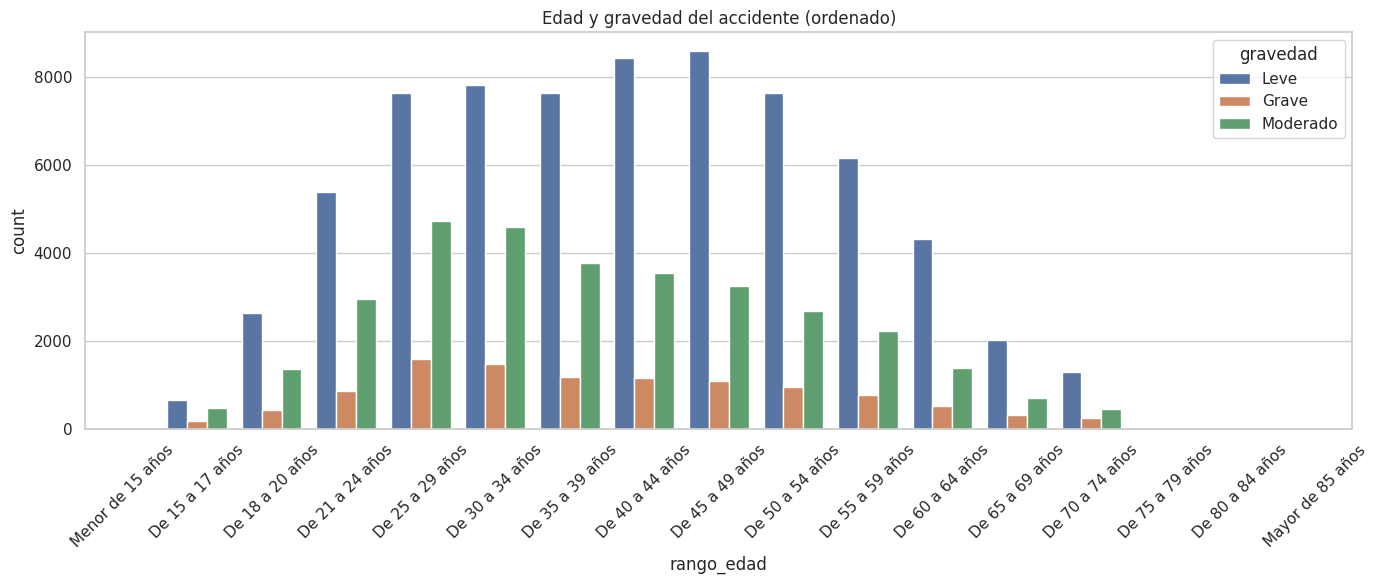

In [16]:
# Orden personalizado de menor a mayor edad
orden_edad = [
    'Menor de 15 años', 'De 15 a 17 años', 'De 18 a 20 años', 'De 21 a 24 años',
    'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años',
    'De 45 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años',
    'De 65 a 69 años', 'De 70 a 74 años', 'De 75 a 79 años', 'De 80 a 84 años',
    'Mayor de 85 años'
]

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='rango_edad', hue='gravedad', order=orden_edad)
plt.title('Edad y gravedad del accidente (ordenado)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



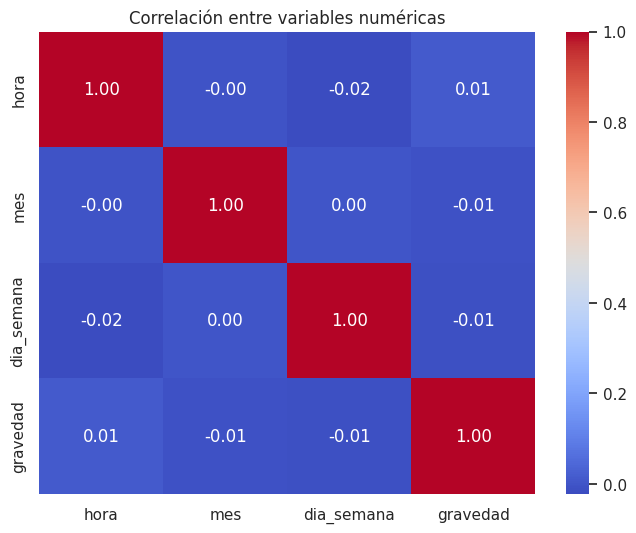

In [17]:
# Mapa de correlaciones entre variables numéricas
import numpy as np

# Solo variables numéricas (hora, mes, día, gravedad codificada)
numericas = df_modelo[['hora', 'mes', 'dia_semana', 'gravedad']]
correlacion = numericas.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables numéricas')
plt.show()


In [18]:

# Guardar el DataFrame como archivo CSV
df.to_csv('mi_dataframe.csv', index=False)

# Descargar el archivo desde Colab
from google.colab import files
files.download('mi_dataframe.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [19]:
# tabla proporcion de tipo de accidente con gravedad
tabla_proporcion = df.groupby('tipo_accidente')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)



gravedad,Grave,Leve,Moderado
tipo_accidente,,,
Alcance,5.71,65.56,28.73
Atropello a animal,11.95,69.81,18.24
Atropello a persona,18.16,56.17,25.67
Caída,19.81,33.18,47.01
Choque contra obstáculo fijo,11.55,64.49,23.96
Colisión frontal,10.24,61.22,28.54
Colisión fronto-lateral,9.28,62.83,27.89
Colisión lateral,5.90,71.27,22.83
Colisión múltiple,5.06,69.97,24.97


In [20]:
# tabla proporcion de tipo_vehiculo con gravedad
tabla_proporcion = df.groupby('tipo_vehiculo')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
tipo_vehiculo,,,
Ambulancia SAMUR,0.00,50.00,50.00
Autobus EMT,14.00,46.67,39.33
Autobús,9.56,63.11,27.32
Autobús articulado,10.00,48.79,41.21
Autobús articulado EMT,66.67,33.33,0.00
Autocaravana,0.00,96.00,4.00
Bicicleta,27.19,20.97,51.84
Bicicleta EPAC (pedaleo asistido),24.16,22.47,53.37
Camión de bomberos,0.00,100.00,0.00


In [21]:
# tabla proporcion de estado_meteorológico con gravedad
tabla_proporcion = df.groupby('estado_meteorológico')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
estado_meteorológico,,,
Despejado,10.14,60.71,29.16
Granizando,0.00,71.43,28.57
LLuvia intensa,10.15,59.30,30.55
Lluvia débil,9.78,57.82,32.40
Nevando,7.89,52.63,39.47
Nublado,9.93,61.30,28.77
Se desconoce,10.43,61.44,28.13


In [22]:
# tabla proporcion de tipo_persona con gravedad
tabla_proporcion = df.groupby('tipo_persona')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
tipo_persona,,,
Conductor,8.75,64.47,26.77
Pasajero,7.16,61.86,30.98
Peatón,35.05,18.28,46.66


In [52]:
# Limpiar strings del estado meteorológico
df['estado_meteorológico'] = df['estado_meteorológico'].str.strip().str.lower()




In [53]:
df['estado_meteo_simplificado'] = df['estado_meteorológico'].replace({
    'despejado': 'Despejado',
    'nublado': 'Nublado',
    'lluvia débil': 'Con precipitaciones',
    'lluvia intensa': 'Con precipitaciones',
    'nevando': 'Con precipitaciones',
    'granizando': 'Con precipitaciones',
    'se desconoce': 'Se desconoce'
})


In [54]:
print(df['estado_meteorológico'].unique())
print(df['estado_meteo_simplificado'].unique())


['despejado' nan 'nublado' 'se desconoce' 'lluvia débil' 'lluvia intensa'
 'nevando' 'granizando']
['Despejado' nan 'Nublado' 'Se desconoce' 'Con precipitaciones']


In [55]:
# tabla proporcion de estado_meteorologicoo con gravedad
tabla_proporcion = df.groupby('estado_meteo_simplificado')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
estado_meteo_simplificado,,,
Con precipitaciones,9.82,58.11,32.07
Despejado,10.14,60.71,29.16
Nublado,9.93,61.30,28.77
Se desconoce,10.43,61.44,28.13


In [48]:
# tabla proporcion de dia de la semana con gravedad
tabla_proporcion = df.groupby('dia_semana')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
dia_semana,,,
0,9.89,61.29,28.82
1,9.65,60.73,29.62
2,9.25,62.29,28.46
3,9.73,61.69,28.59
4,9.54,61.84,28.62
5,10.29,61.52,28.19
6,11.02,60.94,28.04


In [49]:
# tabla proporcion de mes con gravedad
tabla_proporcion = df.groupby('mes')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
mes,,,
1,9.06,62.34,28.61
2,9.03,63.02,27.95
3,9.20,62.21,28.59
4,9.50,62.54,27.97
5,10.39,60.47,29.14
6,10.07,59.84,30.09
7,10.75,59.82,29.43
8,11.30,59.56,29.14
9,10.21,60.51,29.28


In [57]:

# Tabla de proporción de tipo de vehículo con gravedad ordenada por accidentes graves
tabla_proporcion = df.groupby('tipo_vehiculo')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
tabla_proporcion = tabla_proporcion.sort_values(by='Grave', ascending=False)

display(tabla_proporcion)


gravedad,Grave,Leve,Moderado
tipo_vehiculo,,,
Autobús articulado EMT,66.67,33.33,0.00
Patinete no eléctrico,35.71,14.29,50.00
Otros vehículos sin motor,35.00,20.00,45.00
Motocicleta > 125cc,27.94,20.95,51.11
Ciclomotor de dos ruedas L1e-B,27.27,36.36,36.36
Bicicleta,27.19,20.97,51.84
Ciclomotor de tres ruedas,25.00,0.00,75.00
VMU eléctrico,24.56,23.62,51.82
Cuadriciclo no ligero,24.44,31.11,44.44


In [23]:
# tabla proporcion de rango_edad con gravedad
tabla_proporcion = df.groupby('rango_edad')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
rango_edad,,,
De 10 a 14 años,12.70,48.96,38.35
De 15 a 17 años,13.87,50.45,35.68
De 18 a 20 años,9.80,59.36,30.84
De 21 a 24 años,9.48,58.44,32.08
De 25 a 29 años,11.37,54.74,33.89
De 30 a 34 años,10.64,56.29,33.07
De 35 a 39 años,9.40,60.65,29.94
De 40 a 44 años,8.77,64.23,27.01
De 45 a 49 años,8.49,66.33,25.17


In [24]:
# tabla proporcion de sexo con gravedad
tabla_proporcion = df.groupby('sexo')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
sexo,,,
Desconocido,1.68,93.85,4.47
Hombre,9.91,63.72,26.37
Mujer,9.81,56.77,33.41


In [25]:
# tabla proporcion de positiva_alcohol con gravedad
tabla_proporcion = df.groupby('positiva_alcohol')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
positiva_alcohol,,,
N,9.80,61.31,28.89
S,11.52,68.03,20.45


In [26]:
# tabla proporcion de distrito con gravedad
tabla_proporcion = df.groupby('distrito')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
distrito,,,
ARGANZUELA,8.17,65.51,26.32
BARAJAS,10.73,59.55,29.72
CARABANCHEL,9.25,62.24,28.51
CENTRO,10.94,58.13,30.93
CHAMARTÍN,7.66,65.75,26.59
CHAMBERÍ,11.39,60.42,28.19
CIUDAD LINEAL,9.02,62.32,28.66
FUENCARRAL-EL PARDO,10.69,59.36,29.95
HORTALEZA,11.35,58.01,30.64


In [27]:
# tabla proporcion de positiva_droga con gravedad
tabla_proporcion = df.groupby('positiva_droga')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)

gravedad,Grave,Leve,Moderado
positiva_droga,,,
1.0,17.59,67.17,15.24


In [28]:
# Primero aseguramos que 'hora' sea tipo entero (int)
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S', errors='coerce').dt.hour

# Ahora sí podemos crear la franja horaria
def clasificar_franja(hora):
    if 0 <= hora < 6:
        return 'Madrugada'
    elif 6 <= hora < 12:
        return 'Mañana'
    elif 12 <= hora < 18:
        return 'Tarde'
    else:
        return 'Noche'

df['franja_horaria'] = df['hora'].apply(clasificar_franja)


In [29]:
tabla_proporcion = df.groupby('franja_horaria')['gravedad'].value_counts(normalize=True).unstack().fillna(0) * 100
tabla_proporcion = tabla_proporcion.round(2)
display(tabla_proporcion)


gravedad,Grave,Leve,Moderado
franja_horaria,,,
Madrugada,14.15,57.69,28.16
Mañana,10.38,60.51,29.11
Noche,9.63,62.07,28.30
Tarde,8.98,62.27,28.75


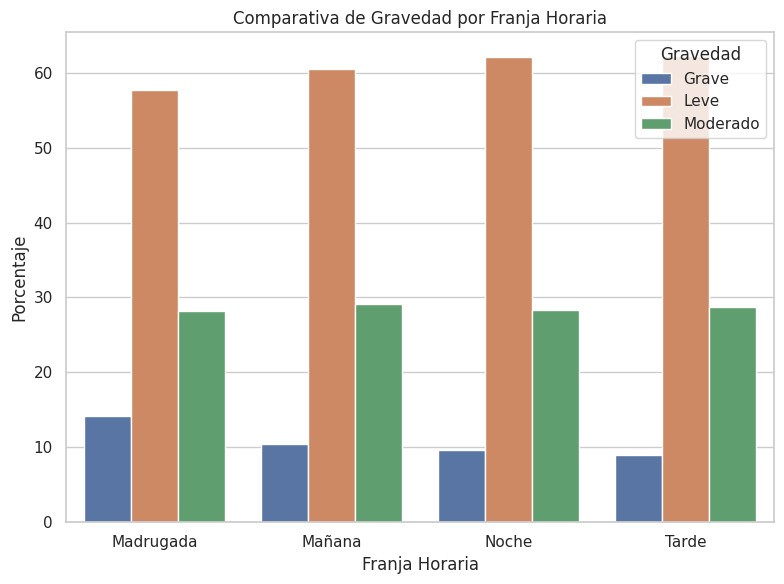

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos directamente de la tabla
data = {
    'franja_horaria': ['Madrugada', 'Mañana', 'Noche', 'Tarde'],
    'Grave': [14.15, 10.38, 9.63, 8.98],
    'Leve': [57.69, 60.51, 62.07, 62.27],
    'Moderado': [28.16, 29.11, 28.30, 28.75]
}

df_franja = pd.DataFrame(data)

# Reorganizar para formato largo
df_melt = df_franja.melt(id_vars='franja_horaria', var_name='Gravedad', value_name='Porcentaje')

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.barplot(data=df_melt, x='franja_horaria', y='Porcentaje', hue='Gravedad')

plt.title('Comparativa de Gravedad por Franja Horaria')
plt.xlabel('Franja Horaria')
plt.ylabel('Porcentaje')
plt.legend(title='Gravedad')
plt.tight_layout()
plt.show()


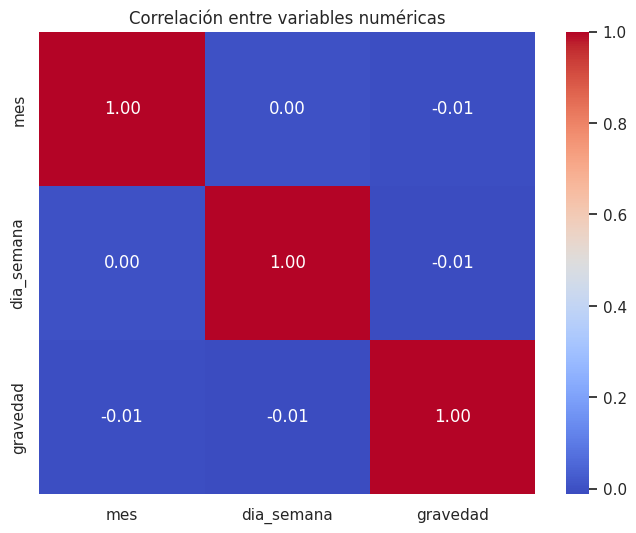

In [31]:
# Mapa de correlaciones entre variables numéricas
import numpy as np

# Solo variables numéricas (hora, mes, día, gravedad codificada)
numericas = df_modelo[['mes', 'dia_semana', 'gravedad']]

correlacion = numericas.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlación entre variables numéricas')
plt.show()


In [32]:
df.select_dtypes(include=['int64', 'float64']).columns.tolist()


['positiva_droga']

In [33]:
# Paso 1: comprobar si la columna 'hora' sigue existiendo
if 'hora' in df.columns:
    print("La columna 'hora' está en el dataframe.")
    print("Valores únicos de 'hora':", df['hora'].unique())
else:
    print("La columna 'hora' NO está en el dataframe.")

# Paso 2: comprobar si la columna 'franja_horaria' existe
if 'franja_horaria' in df.columns:
    print("\nLa columna 'franja_horaria' está en el dataframe.")
    print("Valores únicos de 'franja_horaria':", df['franja_horaria'].unique())
else:
    print("\nLa columna 'franja_horaria' NO está en el dataframe.")


La columna 'hora' está en el dataframe.
Valores únicos de 'hora': [ 5  6  2  3  9 10 16 19  1 22 14  7 12 20 15 18 17 11 23  8 13  4 21  0]

La columna 'franja_horaria' está en el dataframe.
Valores únicos de 'franja_horaria': ['Madrugada' 'Mañana' 'Tarde' 'Noche']


In [34]:
# Convertimos 'fecha' y 'hora'
df['fecha'] = pd.to_datetime(df['fecha'], dayfirst=True, errors='coerce')
df['hora'] = pd.to_datetime(df['hora'], format='%H:%M:%S', errors='coerce').dt.hour

# Creamos variables temporales necesarias
df['mes'] = df['fecha'].dt.month
df['dia_semana'] = df['fecha'].dt.dayofweek  # Lunes = 0, Domingo = 6


In [35]:
y = le.fit_transform(df_modelo['gravedad'])
X = df_modelo.drop(columns='gravedad')



In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
# Buscar en X si alguna columna aún contiene ese texto
for col in X.columns:
    if X[col].astype(str).str.contains('Sin asistencia sanitaria').any():
        print(f"🧨 COLUMNA con texto sin codificar: {col}")



In [38]:
from sklearn.linear_model import LogisticRegression


🔹 REGRESIÓN LOGÍSTICA
              precision    recall  f1-score   support

           0       0.43      0.06      0.11      3562
           1       0.77      0.92      0.84     22334
           2       0.55      0.49      0.52     10410

    accuracy                           0.71     36306
   macro avg       0.58      0.49      0.49     36306
weighted avg       0.67      0.71      0.67     36306



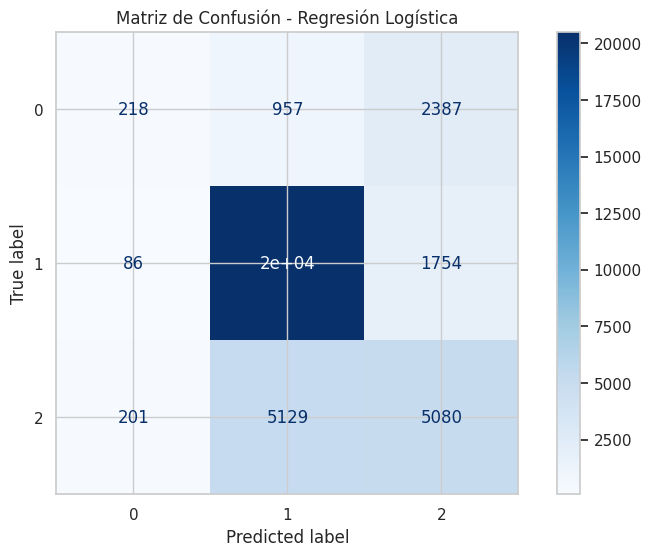

🔹 RANDOM FOREST
              precision    recall  f1-score   support

           0       0.38      0.16      0.22      3562
           1       0.78      0.89      0.83     22334
           2       0.54      0.48      0.51     10410

    accuracy                           0.70     36306
   macro avg       0.57      0.51      0.52     36306
weighted avg       0.67      0.70      0.68     36306



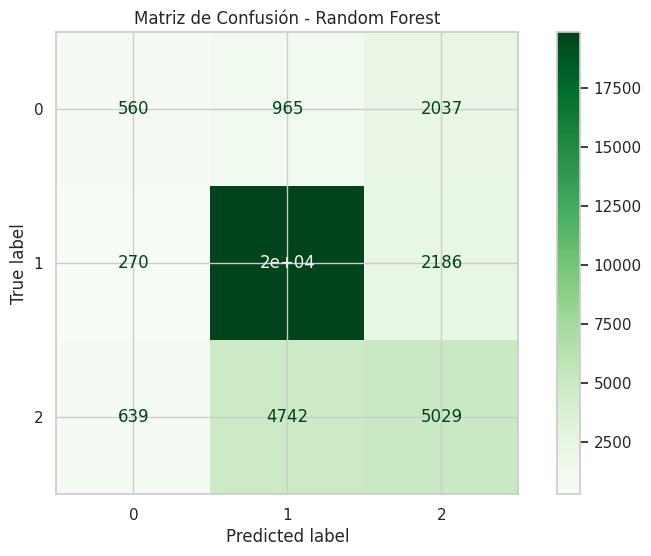

In [59]:

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


class_names = [str(c) for c in le.classes_]   # ‘le’ es tu LabelEncoder ya ajustado

#  1. REGRESIÓN LOGÍSTICA
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🔹 REGRESIÓN LOGÍSTICA")
print(classification_report(y_test, y_pred_log, target_names=class_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log,
    display_labels=class_names,
    cmap='Blues'
)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

#  2. RANDOM FOREST
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("🔹 RANDOM FOREST")
print(classification_report(y_test, y_pred_rf, target_names=class_names))

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    display_labels=class_names,
    cmap='Greens'
)
plt.title("Matriz de Confusión - Random Forest")
plt.show()



🔹 REGRESIÓN LOGÍSTICA
              precision    recall  f1-score   support

           0       0.43      0.06      0.11      3562
           1       0.77      0.92      0.84     22334
           2       0.55      0.49      0.52     10410

    accuracy                           0.71     36306
   macro avg       0.58      0.49      0.49     36306
weighted avg       0.67      0.71      0.67     36306



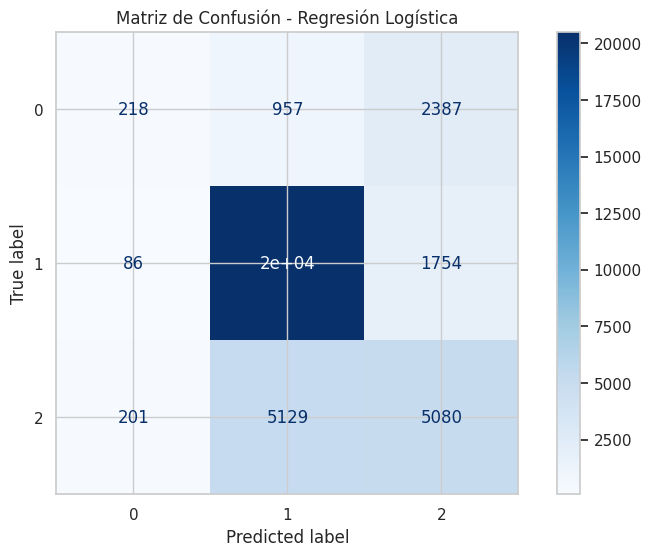


 RANDOM FOREST
              precision    recall  f1-score   support

           0       0.38      0.16      0.22      3562
           1       0.78      0.89      0.83     22334
           2       0.54      0.48      0.51     10410

    accuracy                           0.70     36306
   macro avg       0.57      0.51      0.52     36306
weighted avg       0.67      0.70      0.68     36306



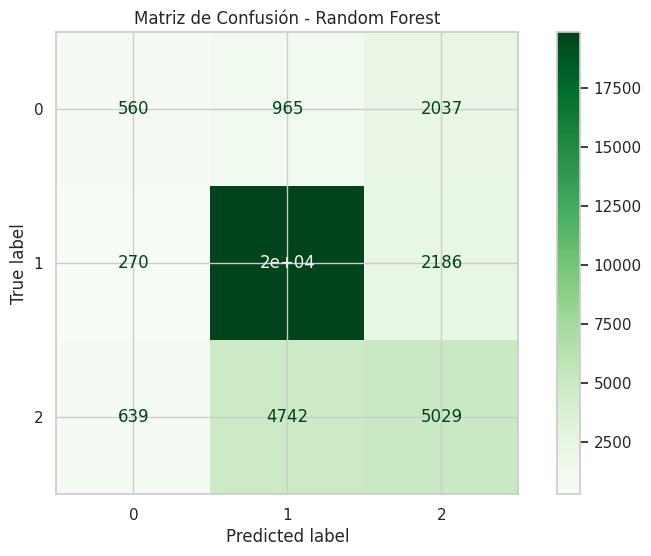

In [60]:
# IMPORTACIONES NECESARIAS
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# ENTRENAMIENTO Y PREDICCIÓN - REGRESIÓN LOGÍSTICA
log_model = LogisticRegression(max_iter=2000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("🔹 REGRESIÓN LOGÍSTICA")
print(classification_report(y_test, y_pred_log, target_names=class_names))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log,
    display_labels=class_names,
    cmap='Blues'
)
plt.title("Matriz de Confusión - Regresión Logística")
plt.show()

# ENTRENAMIENTO Y PREDICCIÓN - RANDOM FOREST
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n RANDOM FOREST")
print(classification_report(y_test, y_pred_rf, target_names=class_names))
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    display_labels=class_names,
    cmap='Greens'
)
plt.title("Matriz de Confusión - Random Forest")
plt.show()


In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


In [62]:
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)


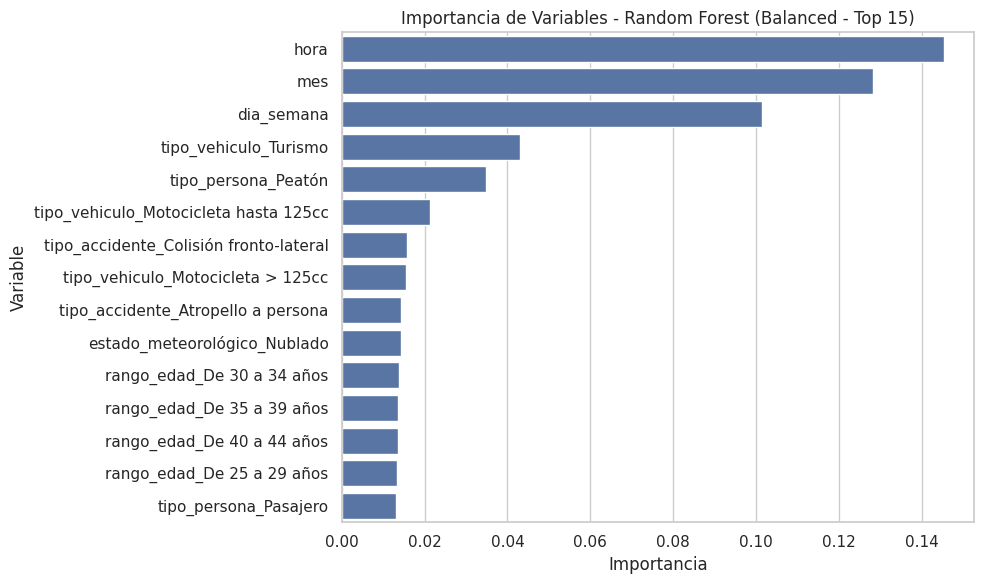

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

importancia = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importancia.values[:15], y=importancia.index[:15])
plt.title("Importancia de Variables - Random Forest (Balanced - Top 15)")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


In [64]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score

y_test_bin = label_binarize(y_test, classes=[0,1,2])
y_pred_proba = rf_model.predict_proba(X_test)

roc_auc = roc_auc_score(y_test_bin, y_pred_proba, average='macro')
print(f"🎯 ROC AUC promedio (macro): {roc_auc:.3f}")


🎯 ROC AUC promedio (macro): 0.789


In [65]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'class_weight': ['balanced']
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_weighted')
grid.fit(X_train, y_train)

print("🎯 Mejor modelo:", grid.best_params_)
best_model = grid.best_estimator_


🎯 Mejor modelo: {'class_weight': 'balanced', 'max_depth': None, 'n_estimators': 200}


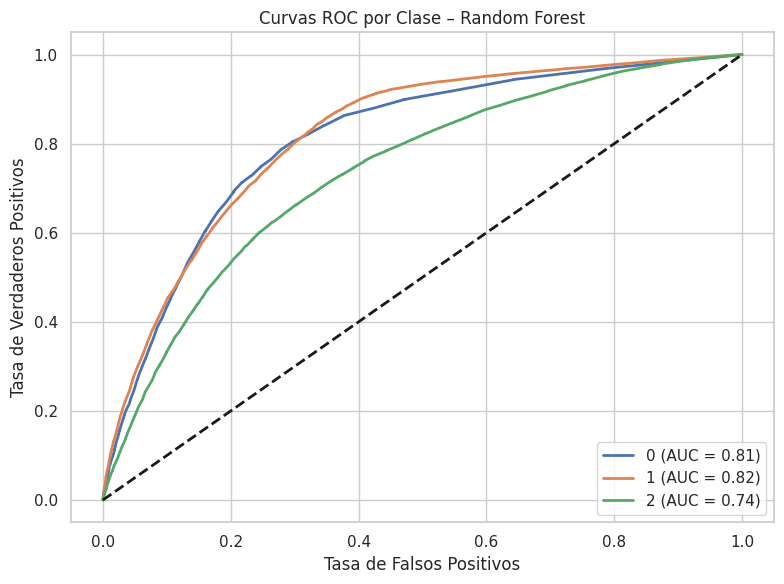

In [66]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import RocCurveDisplay

import matplotlib.pyplot as plt
import numpy as np

# Binarizar y predecir
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_proba = rf_model.predict_proba(X_test)

# Curva ROC por clase
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot
plt.figure(figsize=(8, 6))
for i, clase in enumerate(le.classes_):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{clase} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC por Clase – Random Forest')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()


In [67]:
import pandas as pd

# Datos obtenidos del classification_report de cada modelo
data = {
    "Clase": ["Grave", "Moderado", "Leve"],
    "Precisión (Logística)": [0.43, 0.56, 0.77],
    "Recall (Logística)": [0.06, 0.49, 0.92],
    "F1-score (Logística)": [0.11, 0.52, 0.84],
    "Precisión (RF Balanced)": [0.33, 0.51, 0.78],
    "Recall (RF Balanced)": [0.17, 0.49, 0.86],
    "F1-score (RF Balanced)": [0.23, 0.50, 0.81],
}

tabla_metricas = pd.DataFrame(data)
tabla_metricas


,Clase,Precisión (Logística),Recall (Logística),F1-score (Logística),Precisión (RF Balanced),Recall (RF Balanced),F1-score (RF Balanced)
0,Grave,0.43,0.06,0.11,0.33,0.17,0.23
1,Moderado,0.56,0.49,0.52,0.51,0.49,0.50
2,Leve,0.77,0.92,0.84,0.78,0.86,0.81


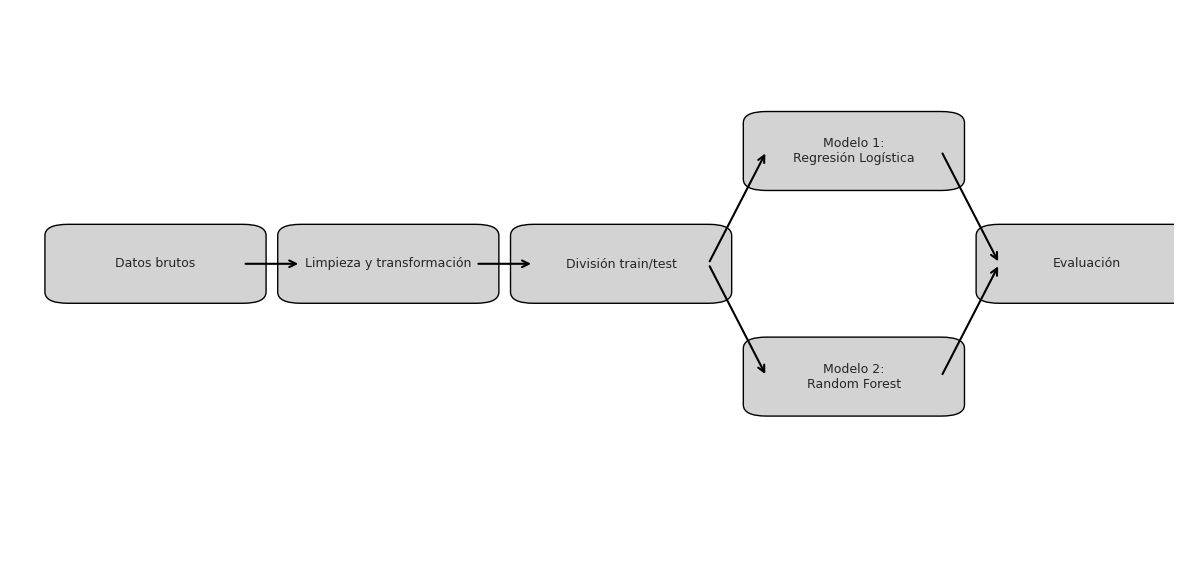

In [68]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Crear una figura y un eje
fig, ax = plt.subplots(figsize=(12, 6))
ax.axis('off')

# Definir los bloques y sus posiciones
blocks = [
    ("Datos brutos", (0.05, 0.5)),
    ("Limpieza y transformación", (0.25, 0.5)),
    ("División train/test", (0.45, 0.5)),
    ("Modelo 1:\nRegresión Logística", (0.65, 0.7)),
    ("Modelo 2:\nRandom Forest", (0.65, 0.3)),
    ("Evaluación", (0.85, 0.5))
]

# Dibujar los bloques
for text, (x, y) in blocks:
    box = patches.FancyBboxPatch((x, y), 0.15, 0.1,
                                  boxstyle="round,pad=0.02", edgecolor="black", facecolor="lightgray")
    ax.add_patch(box)
    ax.text(x + 0.075, y + 0.05, text, ha='center', va='center', fontsize=9)

# Dibujar las flechas
arrowprops = dict(arrowstyle="->", color='black', lw=1.5)
coords = [b[1] for b in blocks]

# Conexiones principales
ax.annotate('', xy=(coords[1][0], coords[1][1] + 0.05), xytext=(coords[0][0] + 0.15, coords[0][1] + 0.05), arrowprops=arrowprops)
ax.annotate('', xy=(coords[2][0], coords[2][1] + 0.05), xytext=(coords[1][0] + 0.15, coords[1][1] + 0.05), arrowprops=arrowprops)


# Ramas hacia modelos
ax.annotate('', xy=(coords[3][0], coords[3][1] + 0.05), xytext=(coords[2][0] + 0.15, coords[2][1] + 0.05), arrowprops=arrowprops)
ax.annotate('', xy=(coords[4][0], coords[4][1] + 0.05), xytext=(coords[2][0] + 0.15, coords[2][1] + 0.05), arrowprops=arrowprops)

# Convergencia hacia evaluación
ax.annotate('', xy=(coords[5][0], coords[5][1] + 0.05), xytext=(coords[3][0] + 0.15, coords[3][1] + 0.05), arrowprops=arrowprops)
ax.annotate('', xy=(coords[5][0], coords[5][1] + 0.05), xytext=(coords[4][0] + 0.15, coords[4][1] + 0.05), arrowprops=arrowprops)

# Mostrar y guardar
plt.tight_layout()
plt.savefig("flujo_modelado.png", dpi=300)
plt.show()


                         Accuracy  Precision (macro)  Recall (macro)  \
Regresión Logística OvR  0.710406           0.584543        0.488936   
Random Forest            0.703437           0.570645        0.510494   

                         F1-score (macro)  
Regresión Logística OvR          0.487571  
Random Forest                    0.521170  


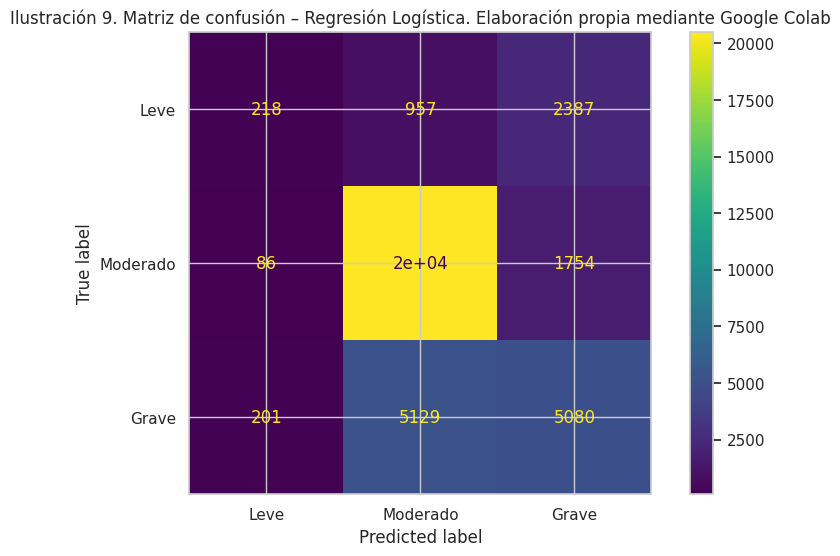

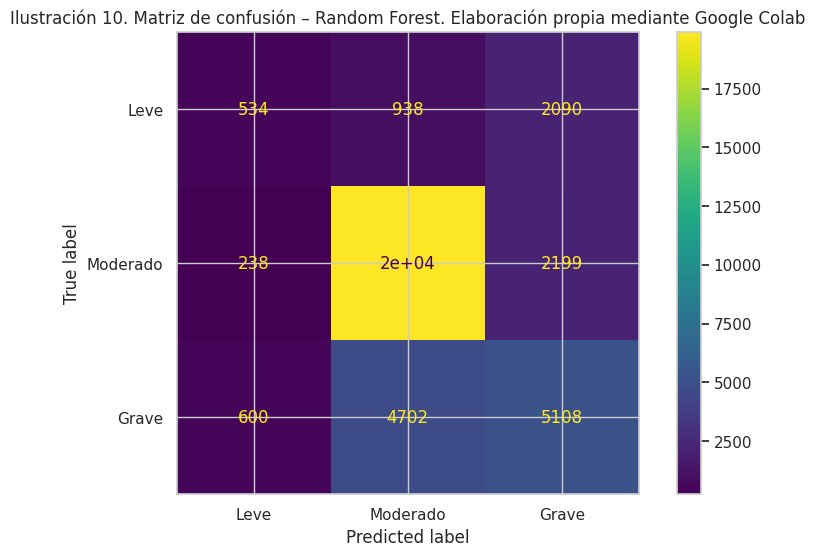

In [69]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import matplotlib.pyplot as plt

# 1. Cálculo de métricas y creación de tabla
metrics = {
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision (macro)': [
        precision_score(y_test, y_pred_log, average='macro'),
        precision_score(y_test, y_pred_rf, average='macro')
    ],
    'Recall (macro)': [
        recall_score(y_test, y_pred_log, average='macro'),
        recall_score(y_test, y_pred_rf, average='macro')
    ],
    'F1-score (macro)': [
        f1_score(y_test, y_pred_log, average='macro'),
        f1_score(y_test, y_pred_rf, average='macro')
    ]
}

metrics_df = pd.DataFrame(
    metrics,
    index=['Regresión Logística OvR', 'Random Forest']
)

# Mostrar la tabla
print(metrics_df)

# 2. Matriz de confusión – Regresión Logística
cm_log = confusion_matrix(y_test, y_pred_log)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=['Leve','Moderado','Grave'])
disp_log.plot()
plt.title('Ilustración 9. Matriz de confusión – Regresión Logística. Elaboración propia mediante Google Colab')
plt.savefig('matriz_confusion_log.png', dpi=300)
plt.show()

# 3. Matriz de confusión – Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Leve','Moderado','Grave'])
disp_rf.plot()
plt.title('Ilustración 10. Matriz de confusión – Random Forest. Elaboración propia mediante Google Colab')
plt.savefig('matriz_confusion_rf.png', dpi=300)
plt.show()


In [70]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
model_rf.fit(X_train, y_train)

import pandas as pd

# 1) Extraer importancias del modelo exactamente definido arriba
importances = model_rf.feature_importances_
feature_names = X_train.columns

# 2) Construir DataFrame y pasar a porcentaje
df_imp = pd.DataFrame({
    'Variable': feature_names,
    'Importancia (%)': (importances * 100).round(2)
})

# 3) Ordenar y quedarnos con las 15 primeras
df_imp = df_imp.sort_values('Importancia (%)', ascending=False).head(15)

# 4) Imprimir la tabla lista para copiar en el TFG
print(df_imp.to_string(index=False))


                             Variable  Importancia (%)
                tipo_vehiculo_Turismo            23.28
tipo_vehiculo_Motocicleta hasta 125cc            16.62
                  tipo_persona_Peatón            14.31
    tipo_vehiculo_Motocicleta > 125cc             8.96
                 tipo_accidente_Caída             6.05
              tipo_vehiculo_Furgoneta             3.79
              tipo_vehiculo_Bicicleta             3.34
             tipo_vehiculo_Ciclomotor             2.81
          tipo_vehiculo_VMU eléctrico             2.39
   tipo_accidente_Atropello a persona             2.37
                           sexo_Mujer             1.97
                          sexo_Hombre             1.61
          tipo_vehiculo_Camión rígido             1.33
      tipo_accidente_Colisión lateral             1.12
                tipo_vehiculo_Autobús             0.98


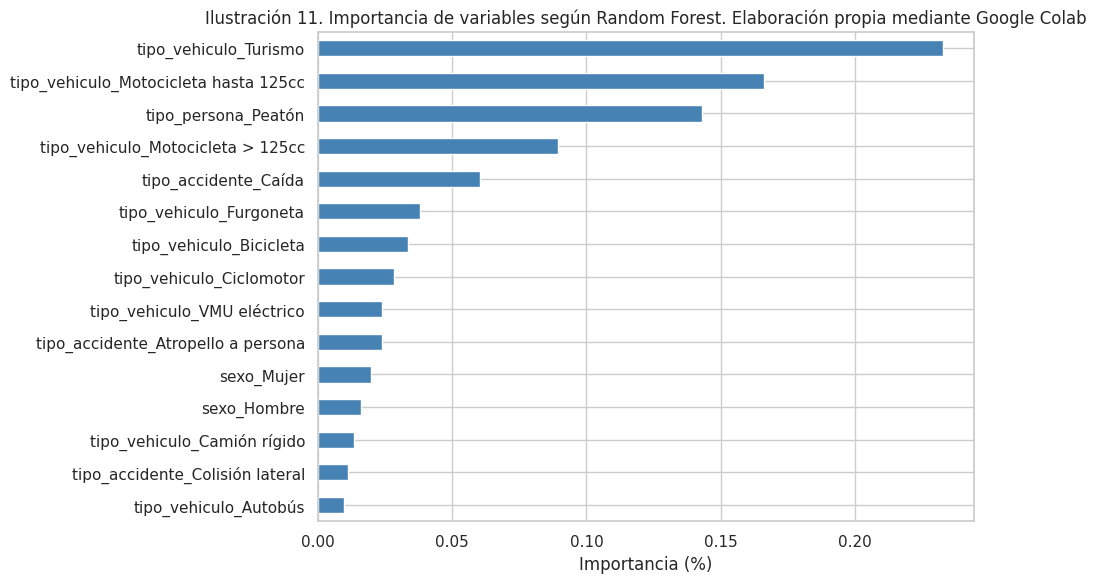

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=42)
rf.fit(X_train, y_train)

import matplotlib.pyplot as plt
import pandas as pd

importances = rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(15)

plt.figure(figsize=(10,6))
feat_imp.plot(kind='barh', color='steelblue')
plt.gca().invert_yaxis()
plt.title('Ilustración 11. Importancia de variables según Random Forest. Elaboración propia mediante Google Colab')
plt.xlabel('Importancia (%)')
plt.tight_layout()
plt.savefig('importancia_variables_codificadas.png', dpi=300)
plt.show()


In [72]:
import pandas as pd

# Calcula el % de valores nulos por columna
tabla_nulos = df.isnull().mean() * 100
tabla_nulos = tabla_nulos.reset_index()
tabla_nulos.columns = ['Columna', '% de valores nulos']

# Filtra solo las columnas con algún nulo (> 0%)
tabla_nulos = tabla_nulos[tabla_nulos['% de valores nulos'] > 0]

# Ordena de mayor a menor y redondea
tabla_nulos = tabla_nulos.sort_values(by='% de valores nulos', ascending=False)
tabla_nulos['% de valores nulos'] = tabla_nulos['% de valores nulos'].round(2)

# Muestra el resultado
display(tabla_nulos)



,Columna,% de valores nulos
1,hora,100.00
11,positiva_droga,99.51
5,estado_meteorológico,2.45
16,estado_meteo_simplificado,2.45
6,tipo_vehiculo,0.13
3,distrito,0.00
4,tipo_accidente,0.00


In [73]:
import pandas as pd

# Creamos manualmente la tabla de recodificación
datos = {
    'Categoría original de lesividad': [
        'Ingreso superior a 24 horas',
        'Ingreso inferior o igual a 24 horas',
        'Fallecido 24 horas',
        'Asistencia sanitaria inmediata en centro de salud o mutua',
        'Asistencia sanitaria sólo en el lugar del accidente',
        'Asistencia sanitaria ambulatoria con posterioridad',
        'Sin asistencia sanitaria'
    ],
    'Clasificación asignada': [
        'Grave', 'Grave', 'Grave',
        'Moderado', 'Moderado',
        'Leve', 'Leve'
    ]
}

tabla_gravedad = pd.DataFrame(datos)

# Mostrar en pantalla (listo para capturar o exportar como imagen)
display(tabla_gravedad)


,Categoría original de lesividad,Clasificación asignada
0,Ingreso superior a 24 horas,Grave
1,Ingreso inferior o igual a 24 horas,Grave
2,Fallecido 24 horas,Grave
3,Asistencia sanitaria inmediata en centro de sa...,Moderado
4,Asistencia sanitaria sólo en el lugar del acci...,Moderado
5,Asistencia sanitaria ambulatoria con posterior...,Leve
6,Sin asistencia sanitaria,Leve


In [74]:
import pandas as pd

# Crear tabla manualmente con columnas eliminadas y sus motivos
columnas_eliminadas = pd.DataFrame({
    'Columna': [
        'num_expediente',
        'numero',
        'cod_distrito',
        'cod_lesividad',
        'coordenada_x_utm',
        'coordenada_y_utm',
        'hora'
    ],
    'Motivo de eliminación': [
        'Identificador administrativo sin valor predictivo',
        'Redundancia administrativa',
        'Código reemplazado por variable distrito',
        'Sustituida por la variable gravedad',
        'No se realiza análisis geoespacial',
        'No se realiza análisis geoespacial',
        '100 % de valores nulos'
    ]
})

# Mostrar tabla
display(columnas_eliminadas)


,Columna,Motivo de eliminación
0,num_expediente,Identificador administrativo sin valor predictivo
1,numero,Redundancia administrativa
2,cod_distrito,Código reemplazado por variable distrito
3,cod_lesividad,Sustituida por la variable gravedad
4,coordenada_x_utm,No se realiza análisis geoespacial
5,coordenada_y_utm,No se realiza análisis geoespacial
6,hora,100 % de valores nulos


In [ ]:
print(df.shape[0])

In [75]:


columnas_finales = [
    'fecha', 'hora', 'localizacion', 'distrito', 'tipo_accidente', 'estado_meteorológico', 'tipo_vehiculo', 'tipo_persona', 'rango_edad', 'sexo', 'positiva_alcohol', 'positiva_droga', 'gravedad', 'franja_horaria', 'mes', 'dia_semana'
]

print(df[columnas_finales].shape[1])


16


In [ ]:
print(X.shape[1])

In [ ]:
print(X_train.shape[0], X_test.shape[0])


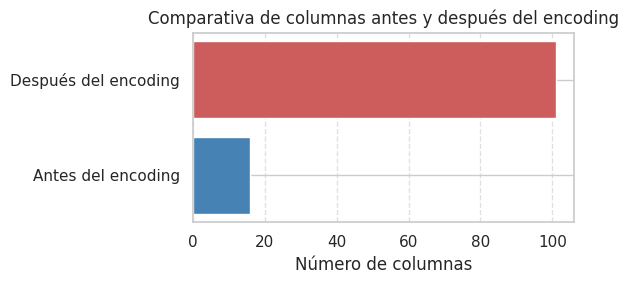

In [76]:
import matplotlib.pyplot as plt

# Datos de ejemplo basados en los tuyos
columnas_antes = 16
columnas_despues = 101

# Crear gráfico de barras horizontales
plt.figure(figsize=(6, 3))
plt.barh(['Antes del encoding', 'Después del encoding'], [columnas_antes, columnas_despues], color=['steelblue', 'indianred'])
plt.xlabel('Número de columnas')
plt.title('Comparativa de columnas antes y después del encoding')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


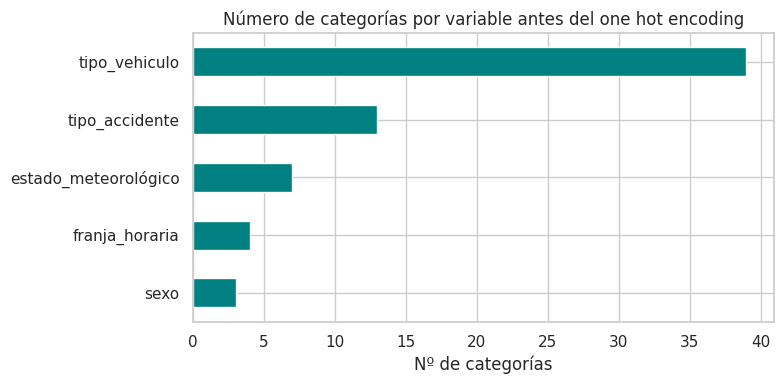

In [77]:
import matplotlib.pyplot as plt

# Lista de columnas categóricas
categoricas = ['tipo_accidente', 'tipo_vehiculo', 'sexo', 'franja_horaria', 'estado_meteorológico']

# Conteo de categorías únicas
categorias = {col: df[col].nunique() for col in categoricas}
categorias_serie = pd.Series(categorias).sort_values()

# Gráfico
plt.figure(figsize=(8, 4))
categorias_serie.plot(kind='barh', color='teal')
plt.title('Número de categorías por variable antes del one hot encoding')
plt.xlabel('Nº de categorías')
plt.tight_layout()
plt.show()


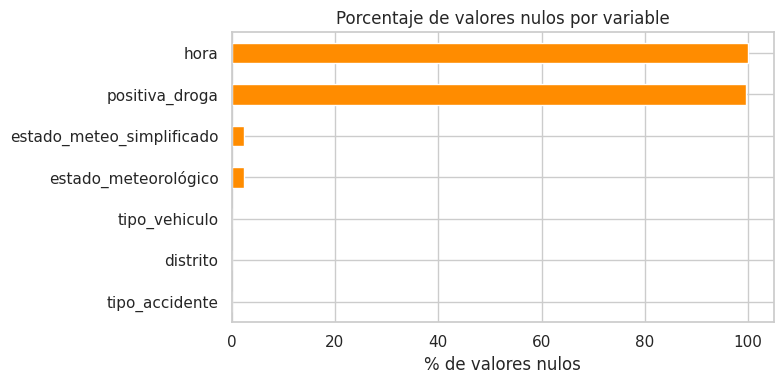

In [78]:
import matplotlib.pyplot as plt

# Calcular % de nulos por columna
porcentaje_nulos = df.isnull().mean() * 100
porcentaje_nulos = porcentaje_nulos[porcentaje_nulos > 0].sort_values()

# Gráfico
plt.figure(figsize=(8, 4))
porcentaje_nulos.plot(kind='barh', color='darkorange')
plt.title('Porcentaje de valores nulos por variable')
plt.xlabel('% de valores nulos')
plt.tight_layout()
plt.show()


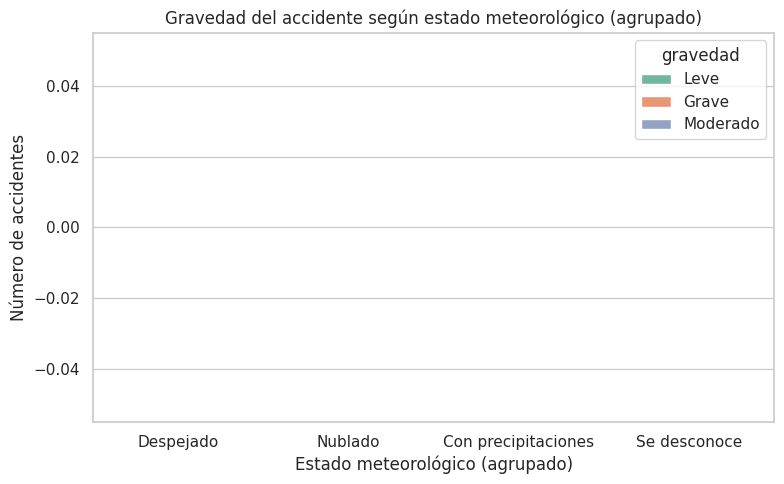

In [79]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear nueva columna con estado meteorológico simplificado
df['estado_meteo_simplificado'] = df['estado_meteorológico'].replace({
    'Despejado': 'Despejado',
    'Nublado': 'Nublado',
    'Lluvia débil': 'Con precipitaciones',
    'Lluvia intensa': 'Con precipitaciones',
    'Nevando': 'Con precipitaciones',
    'Granizando': 'Con precipitaciones',
    'Se desconoce': 'Se desconoce'
})

# Crear la gráfica
plt.figure(figsize=(8, 5))
sns.countplot(
    data=df,
    x='estado_meteo_simplificado',
    hue='gravedad',
    order=['Despejado', 'Nublado', 'Con precipitaciones', 'Se desconoce'],
    palette='Set2'
)
plt.title('Gravedad del accidente según estado meteorológico (agrupado)')
plt.xlabel('Estado meteorológico (agrupado)')
plt.ylabel('Número de accidentes')
plt.tight_layout()
plt.show()


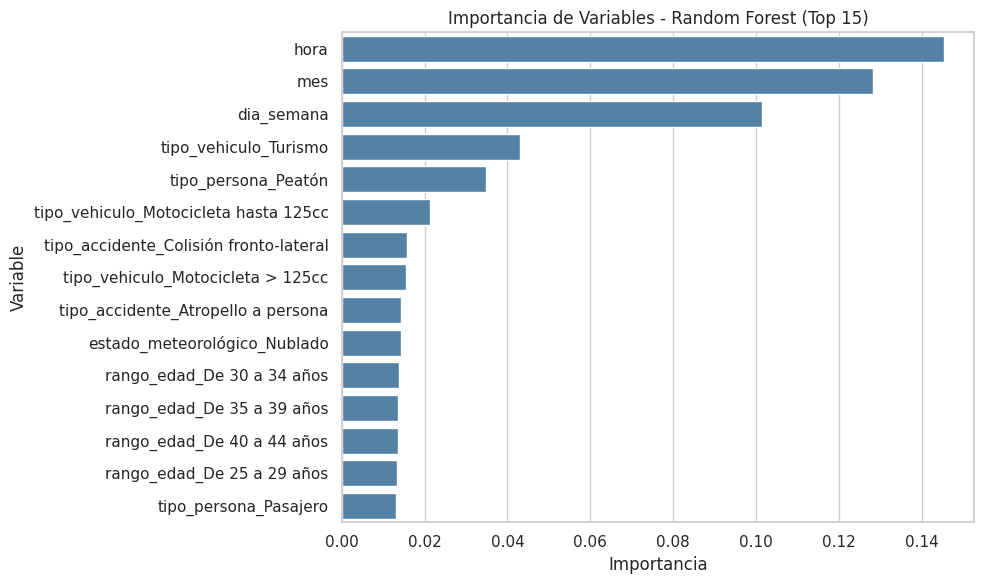

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un DataFrame con las importancias y nombres de variables
importancia = pd.Series(rf_model.feature_importances_, index=X.columns)

# Seleccionar las 15 más importantes
importancia_top15 = importancia.sort_values(ascending=False).head(15)

# Gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=importancia_top15.values, y=importancia_top15.index, color='steelblue')
plt.title('Importancia de Variables - Random Forest (Top 15)')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

